In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('../datasets/final_df.csv')
df.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1440.0,2.0,62.00,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1521.0,3.0,95.00,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,51.00,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2732.0,4.0,204.00,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
temp_df = df[['total_sqft','bath','BHK','price']]

In [4]:
temp_df

,total_sqft,bath,BHK,price
0,1056.0,2.0,2.0,39.07
1,1440.0,2.0,3.0,62.00
2,1521.0,3.0,3.0,95.00
3,1200.0,2.0,2.0,51.00
4,2732.0,4.0,4.0,204.00
...,...,...,...,...
7950,1262.0,2.0,2.0,47.00
7951,1345.0,2.0,3.0,57.00
7952,1715.0,3.0,3.0,112.00
7953,1141.0,2.0,2.0,60.00


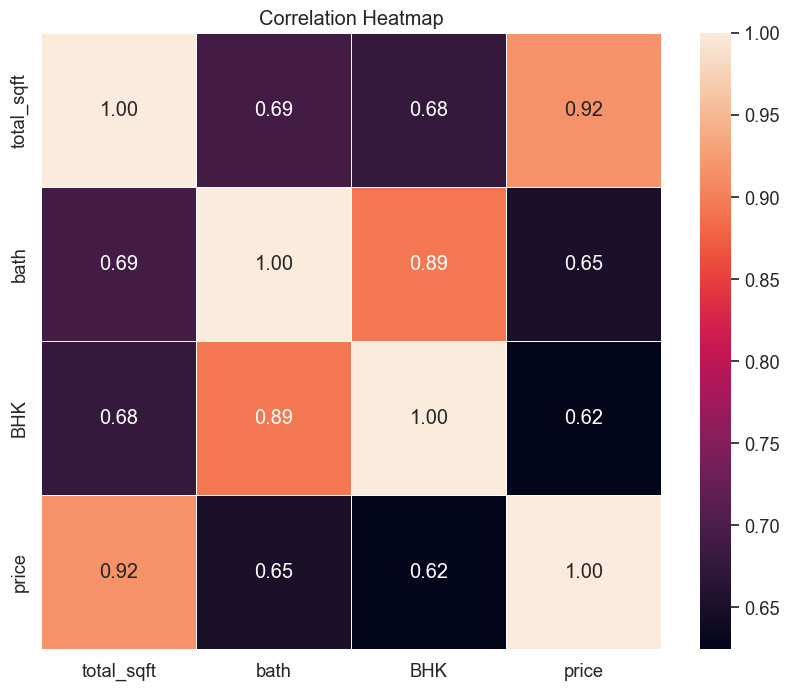

In [9]:
sns.set(font_scale=1.2)  
plt.figure(figsize=(10, 8))  
sns.heatmap(temp_df.corr(), annot=True, fmt=".2f", linewidths=.5)  
plt.title('Correlation Heatmap')  
plt.show()


**It is evident from the heatmap that price and total_sqft are highly correlated.**

**BHK and Bath columns are also highly correlated.**

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(3):
    vif.append(variance_inflation_factor(temp_df.iloc[:,0:3], i))

vif

[8.414812742327744, 41.64604756658791, 40.11168602062093]

In [19]:
pd.DataFrame({'vif': vif}, index=temp_df.columns[0:3]).T

,total_sqft,bath,BHK
vif,8.414813,41.646048,40.111686


**BHK and Bath columns exhibit multicollinearity, as determined by the Variance Inflation Factor (VIF).**

**They exhibit multicollinearity, which is evident due to the imposed limit on the number of bathrooms in comparison to the number of bedrooms (BHK).**

**We could potentially remove one of these features; however, it's not feasible because we're specifically requesting input from the user for both the number of bathrooms and bedrooms (BHK).**

**Since there are no duplicate columns and the number of columns is manageable, we can forego dimensionality reduction through feature selection. This includes various methods such as filter-based techniques, wrapper methods, embedded techniques, and hybrid techniques.**